In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [221]:
data = pd.read_excel('ICUfinal.xlsx', engine="openpyxl", index_col=0)

In [222]:
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,NaN,0
1921,384,0,50th,1,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,NaN,0
1922,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,NaN,0
1923,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,NaN,0


<br><p style="font-size:40px; text-align: right;" ><b>EDA</b></p>

<br><p style="font-size:30px; text-align: right;" >disease analysis and categorizing tags</p>

In [223]:
diseases = []
for x in data["tags"]:
    if isinstance(x, str):
        diseases.extend(x.split(", "))
diseases = list(set(diseases))
print(diseases)

['asthma', 'heart disease', 'Motor Neurone Disease', 'Lung cancer', 'Kidney disease', 'Smoker']


In [224]:
def count_diseases(df):
    disease_count = {}
    for i, row in df.iterrows():
        if isinstance(row["tags"], str):
            for disease in diseases:
                if disease in row["tags"]:
                    disease_count[disease] = disease_count.get(disease, 0) + 1
    disease_count["no illness"] =  len(df.index) - sum(disease_count.values())
    return disease_count

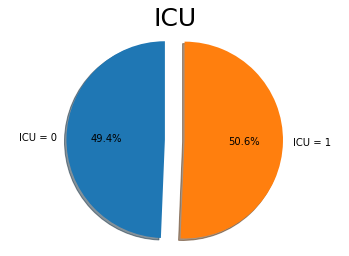

In [225]:
ICU_patients = [data.query('ICU == 0 and WINDOW == "ABOVE_12"').shape[0], 
                data.query('ICU == 1 and WINDOW == "ABOVE_12"').shape[0]]
fig, ax = plt.subplots(1)
ax.pie(ICU_patients, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.set_title('ICU', fontsize=25, fontname="DejaVu Sans")
ax.axis('equal') 
plt.show()

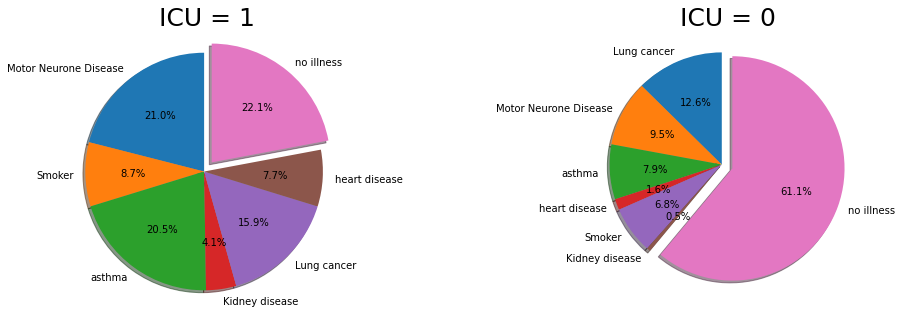

In [226]:
# check which of them are more common in ICU patients. give numbers to them based on that

ICU_patients = data.query('ICU == 1 and WINDOW == "ABOVE_12"')
disease_count = count_diseases(ICU_patients)
fig, ax = plt.subplots(1, 2)
ax[0].pie(disease_count.values(), explode=[0] * (len(disease_count) - 1) + [0.1] , labels=disease_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].set_title('ICU = 1', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal') 

Healthy_patients = data.query('ICU == 0 and WINDOW == "ABOVE_12"')
disease_count = count_diseases(Healthy_patients)
ax[1].pie(disease_count.values(), explode=[0] * (len(disease_count) - 1) + [0.1] , labels=disease_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('ICU = 0', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

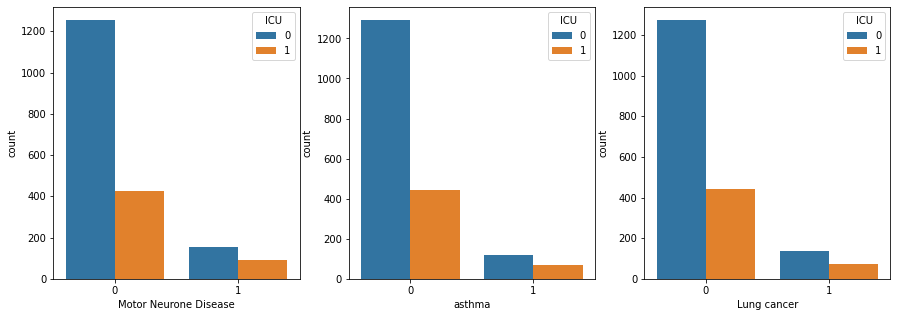

In [227]:
diseases_to_plot = ["Motor Neurone Disease", "asthma", "Lung cancer"]
tags = data["tags"].fillna("")
fig, axes = plt.subplots(ncols=3,nrows=1,figsize=(15,5))
temp_frame = [1 if "Motor" in x else 0 for x in tags]

col = 0

for disease in diseases_to_plot:
    temp_frame = pd.DataFrame(data = {disease: [1 if disease in x else 0 for x in tags],
                        'ICU': data["ICU"]})
    sns.countplot(x=disease, hue="ICU", data=temp_frame, ax = axes[col])
    col += 1

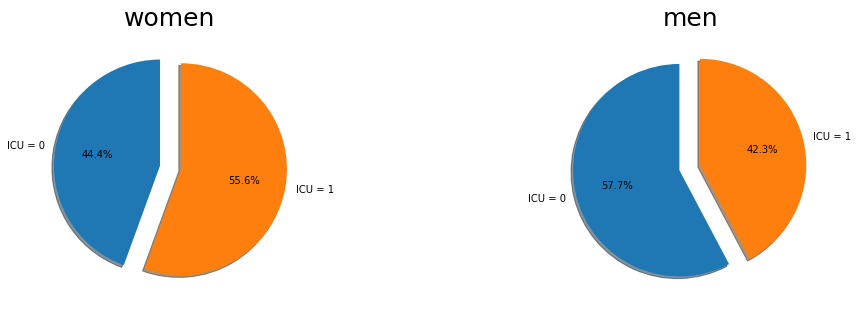

In [228]:
women_to_ICU = [data.query('ICU == 0 and GENDER == 0 and WINDOW == "ABOVE_12"').shape[0], 
                data.query('ICU == 1 and GENDER == 0 and WINDOW == "ABOVE_12"').shape[0]]
men_to_ICU = [data.query('ICU == 0 and GENDER == 1 and WINDOW == "ABOVE_12"').shape[0], 
              data.query('ICU == 1 and GENDER == 1 and WINDOW == "ABOVE_12"').shape[0]]

fig, ax = plt.subplots(1, 2)
ax[0].pie(women_to_ICU, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].set_title('women', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal')      
ax[1].pie(men_to_ICU, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('men', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

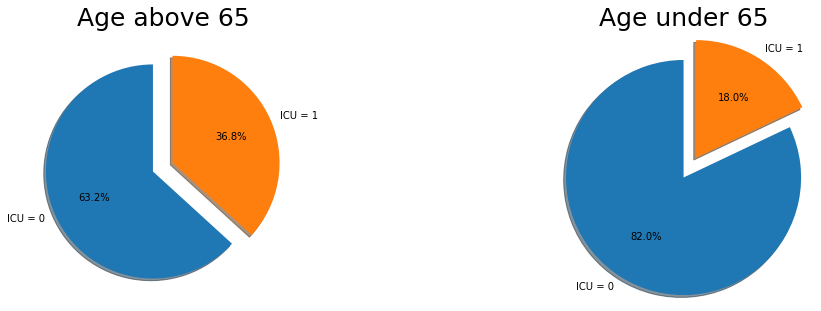

In [229]:
old_age_ICU = [data.query('ICU == 0 and AGE_ABOVE65 == 1').shape[0], data.query('ICU == 1 and AGE_ABOVE65 == 1').shape[0]]
young_age_ICU = [data.query('ICU == 0 and AGE_ABOVE65 == 0').shape[0], data.query('ICU == 1 and AGE_ABOVE65 == 0').shape[0]]

fig, ax = plt.subplots(1, 2)
ax[0].pie(old_age_ICU, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].set_title('Age above 65', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal')      
ax[1].pie(young_age_ICU, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Age under 65', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

# sns.countplot(x="AGE_ABOVE65", hue="ICU", data=data);

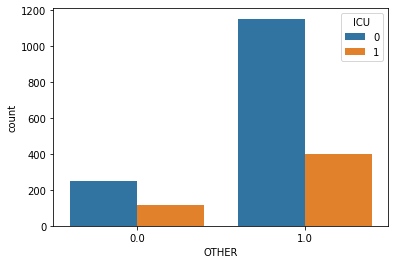

In [230]:
sns.countplot(x="OTHER", hue="ICU", data=data);

In [231]:
print("#NA     #COLUMN: \n")
nas = data.isna().sum()
print(nas.value_counts())

#NA     #COLUMN: 

1104    180
685      18
0         6
686       6
694       6
748       6
5         3
1415      1
dtype: int64


In [232]:
duplicated = data.T.duplicated()
duplicated_cols = data.columns[duplicated].tolist()
duplicated_cols

['ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_DIFF',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'CREATININ_DIFF',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'FFA_DIFF',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GGT_DIFF',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'GLUCOSE_MAX',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_MEAN',
 'HEMATOCRITE_MIN',
 'HEMATOCRITE_MAX',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_MEAN',
 'HEMOGLOBIN_MIN',
 'HEMOGLOBIN_MAX',
 'HEMOGLOBIN_DIFF',
 'INR_MEAN',
 'INR_MIN',
 'IN

In [233]:
not_correlated_to_ICU_columns = (data.corr()["ICU"][abs(data.corr()["ICU"])  < 0.05 ]).keys().tolist()
not_correlated_to_ICU_columns

['PATIENT_VISIT_IDENTIFIER',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'GLUCOSE_MEDIAN',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'GLUCOSE_MAX',
 'P02_ARTERIAL_MEDIAN',
 'P02_ARTERIAL_MEAN',
 'P02_ARTERIAL_MIN',
 'P02_ARTERIAL_MAX',
 'PC02_ARTERIAL_MEDIAN',
 'PC02_ARTERIAL_MEAN',
 'PC02_ARTERIAL_MIN',
 'PC02_ARTERIAL_MAX',
 'PCR_MEDIAN',
 'PCR_MEAN',
 'PCR_MIN',
 'PCR_MAX',
 'PH_ARTERIAL_MEDIAN',
 'PH_ARTERIAL_MEAN',
 'PH_ARTERIAL_MIN',
 'PH_ARTERIAL_MAX',
 'DIMER_MEDIAN',
 'DIMER_MEAN',
 'DIMER_MIN',
 'DIMER_MAX',
 'HEART_RATE_MEAN',
 'OXYGEN_SATURATION_MEAN',
 'HEART_RATE_MEDIAN',
 'OXYGEN_SATURATION_MEDIAN']

In [234]:
correlated_cols = abs(data.corr()) > 0.95
correlated_columns = []
cols = correlated_cols.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if correlated_cols.loc[cols[i], cols[j]]:
            correlated_columns.append((cols[i], cols[j]))


In [235]:
correlated_columns

[('ALBUMIN_MEDIAN', 'ALBUMIN_MEAN'),
 ('ALBUMIN_MEDIAN', 'ALBUMIN_MIN'),
 ('ALBUMIN_MEDIAN', 'ALBUMIN_MAX'),
 ('ALBUMIN_MEAN', 'ALBUMIN_MIN'),
 ('ALBUMIN_MEAN', 'ALBUMIN_MAX'),
 ('ALBUMIN_MIN', 'ALBUMIN_MAX'),
 ('BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN'),
 ('BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MIN'),
 ('BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MAX'),
 ('BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN'),
 ('BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MAX'),
 ('BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX'),
 ('BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN'),
 ('BE_VENOUS_MEDIAN', 'BE_VENOUS_MIN'),
 ('BE_VENOUS_MEDIAN', 'BE_VENOUS_MAX'),
 ('BE_VENOUS_MEAN', 'BE_VENOUS_MIN'),
 ('BE_VENOUS_MEAN', 'BE_VENOUS_MAX'),
 ('BE_VENOUS_MIN', 'BE_VENOUS_MAX'),
 ('BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN'),
 ('BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MIN'),
 ('BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MAX'),
 ('BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN'),
 ('BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MAX'),
 ('BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX'),
 ('BIC_VENOUS_MEDIAN', 'BIC_

<br><p style="font-size:40px; text-align: right;" ><b>Feature Engineering</b></p>

<br><p style="font-size:24px; text-align: right;" >در ابتدا ستون های غیر عددی را به ستون های عددی تبدیل میکنیم</p>

In [236]:
data.select_dtypes('object')

,AGE_PERCENTIL,WINDOW,tags
0,60th,0-2,"Motor Neurone Disease, Smoker"
1,60th,2-4,"Motor Neurone Disease, Smoker"
2,60th,4-6,"Motor Neurone Disease, Smoker"
3,60th,6-12,"Motor Neurone Disease, Smoker"
4,60th,ABOVE_12,"Motor Neurone Disease, Smoker"
...,...,...,...
1920,50th,0-2,NaN
1921,50th,2-4,NaN
1922,50th,4-6,NaN
1923,50th,6-12,NaN


as we see most deadly diseases are 'motor neurone disease', 'asthma' and 'lung cancer' at first place.<br>
smoke and heart disease at second place and Kidney disease at third place.<br>
we give numbers to each of them as bellow <br>
motor, asthma or lung caner --> 3<br>
smoke or heart disease --> 2<br>
kidney disease --> 1<br>
no disease --> 0

In [237]:
data["tags"] = data["tags"].apply(lambda x: 0 if not isinstance(x, str) else (3 if any(disease in x.split(', ') for disease 
                                  in ['Motor Neurone Disease', 'Lung cancer', 'asthma']) else (2 if any(disease in x.split(', ') for disease 
                                  in ['Smoker', 'heart disease']) else  1)))
data["tags"]

0       3
1       3
2       3
3       3
4       3
       ..
1920    0
1921    0
1922    0
1923    0
1924    3
Name: tags, Length: 1925, dtype: int64

In [238]:
# data["OXYGEN_SATURATION_DIFF"].value_counts()
# data["AGE_PERCENTIL"].unique()
data["AGE_PERCENTIL"] = data["AGE_PERCENTIL"].apply(lambda x: 10 if "Above" in x else int(x[0]))
data["AGE_PERCENTIL"].value_counts()

2     215
1     205
3     205
4     200
7     195
5     190
8     190
6     185
10    185
9     155
Name: AGE_PERCENTIL, dtype: int64

In [239]:
data["WINDOW"] = data["WINDOW"].apply(lambda x: 5 if "ABOVE" in x else int(int(x[0])/2 + 1))
data["WINDOW"].value_counts()

1    385
2    385
3    385
4    385
5    385
Name: WINDOW, dtype: int64

In [240]:
# Drop columns with constant value (same value for all rows)
col = data.columns[data.nunique() <= 1].tolist()
print(col)
data.drop(columns = col, inplace=True)

['ALBUMIN_DIFF', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF', 'POTASSIUM_DIFF', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF', 'SODIUM_DIFF', 'TGO_DIFF', 'TGP_DIFF', 'TTPA_DIFF', 'UREA_DIFF', 'DIMER_DIFF']


In [241]:
# drops duplicate columns. keeps one of the duplicate columns of each group
data = data.T.drop_duplicates().T

In [242]:
# d = data.copy()
# for i in range(0, d.shape[0], 5):
#     if d["ICU"][i+4] == 1:
#         d["ICU"][i+3] = d["ICU"][i+2] = d["ICU"][i+1] = d["ICU"][i] = 1


In [243]:
# remove columns with more than 0.5 null ratio
data.dropna(axis=1, how="any", thresh=data.shape[0] * 0.5, subset=None, inplace=True)

In [245]:
# fill nas with mean

NA_filled_first_window = []
for patient_id in data['PATIENT_VISIT_IDENTIFIER'].unique():
    temp = data[data['PATIENT_VISIT_IDENTIFIER'] == patient_id]
    temp.fillna(temp.mean(),inplace=True)
    NA_filled_first_window.append(temp.iloc[[0]])
data = pd.concat(NA_filled_first_window)

# for patient_id in data['PATIENT_VISIT_IDENTIFIER'].unique():
#     patient_data = data[data["PATIENT_VISIT_IDENTIFIER"] == patient_id]
#     patient_data = patient_data.fillna(patient_data.mean())
# data

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [246]:
data = data.fillna(value=data.mean(skipna = True))

In [254]:
# d.drop(not_correlated_columns, axis=1)
# all not correlated columns is subset of fullof na
# not_correlated_columns
for col in not_correlated_to_ICU_columns:
    if col in data.columns:
        data.drop(col, axis=1, inplace = True)


In [255]:
data

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,1.0,6.0,0.0,0.0,0.086420,-0.230769,-0.593220,-0.285714,0.086420,-0.230769,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,3.0,0.0
5,1.0,9.0,1.0,1.0,-0.283951,-0.046154,0.830508,-0.107143,-0.283951,-0.046154,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,1.0
10,0.0,1.0,0.0,0.0,-0.427812,-0.688640,-0.636692,0.207217,-0.423868,-0.733333,...,-0.885522,-0.595604,-0.419448,-0.681860,-0.792832,-0.752732,-0.887561,1.0,0.0,0.0
15,0.0,4.0,1.0,0.0,-0.132620,-0.484650,-0.506215,-0.119762,-0.102881,-0.482051,...,-0.723906,-0.769565,-0.685906,-0.689698,-0.776583,-0.682540,-0.724145,1.0,0.0,0.0
20,0.0,1.0,0.0,0.0,0.236838,-0.101680,-0.539451,0.189142,0.251029,-0.102564,...,-0.959596,-0.884058,-0.826611,-0.839287,-0.896057,-0.766042,-0.960291,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,0.0,4.0,1.0,0.0,-0.160494,-0.692308,-0.457627,0.142857,-0.160494,-0.692308,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,0.0
1905,1.0,10.0,0.0,0.0,-0.403292,-0.638462,-0.514124,0.089286,-0.407407,-0.615385,...,-0.979798,-0.991304,-0.935754,-0.902335,-0.939068,-0.654898,-0.980026,1.0,0.0,0.0
1910,0.0,5.0,0.0,0.0,-0.021674,-0.466520,-0.396287,-0.081293,-0.020576,-0.476923,...,-0.946128,-0.837999,-0.745459,-0.872459,-0.730617,-0.832872,-0.945017,1.0,0.0,0.0
1915,0.0,4.0,1.0,0.0,-0.052457,-0.415974,-0.575817,-0.059387,-0.078189,-0.435897,...,-0.946128,-0.850932,-0.861989,-0.852417,-0.857826,-0.857536,-0.946175,1.0,0.0,0.0


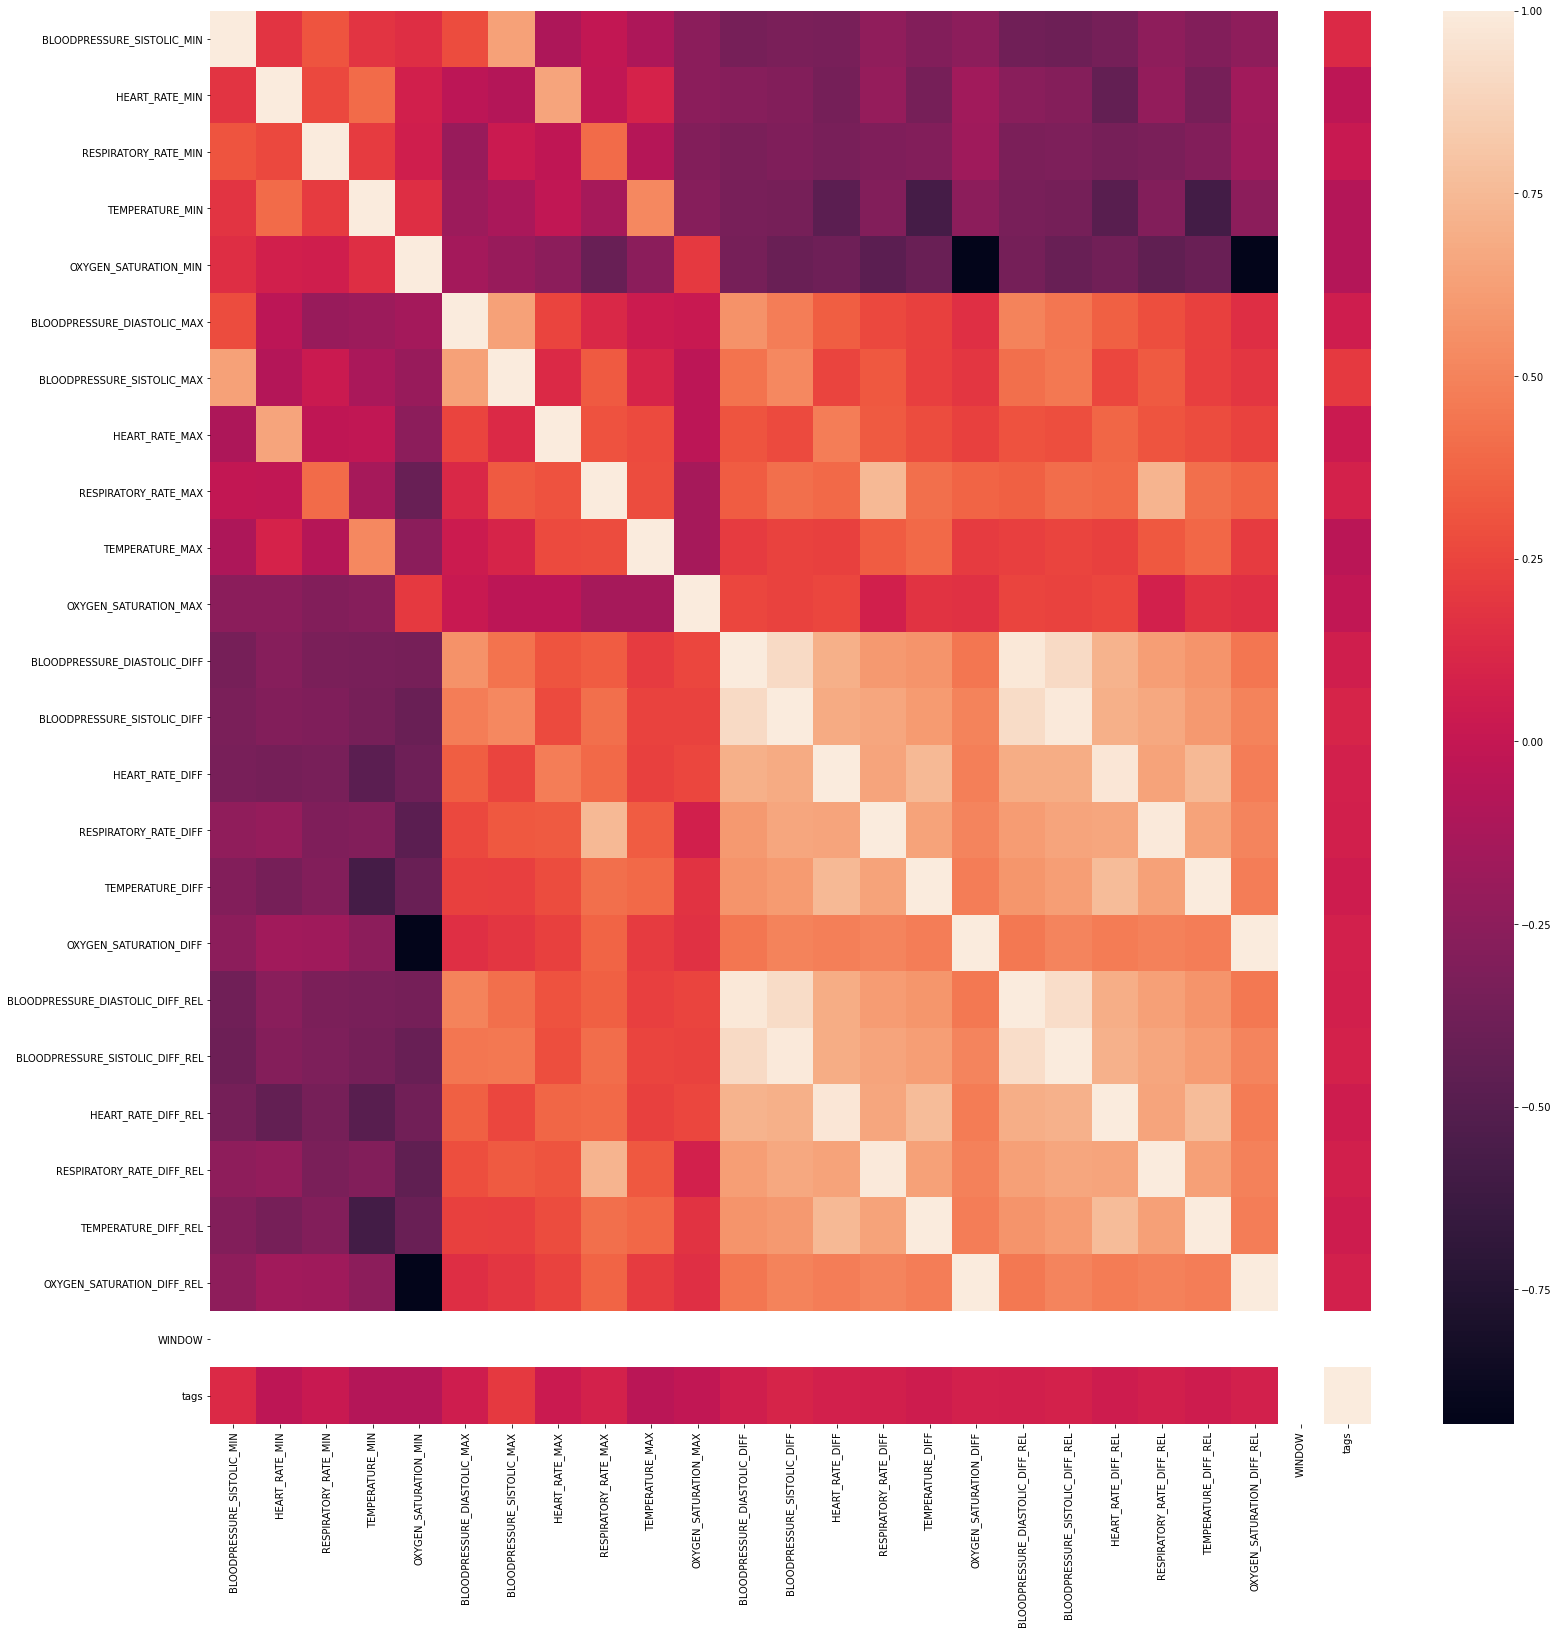

In [258]:
vital_signs = data.columns[13:39]
vital_signs_df = data[vital_signs]
f,ax = plt.subplots(figsize=(26,26))
sns.heatmap(vital_signs_df.drop(columns=['ICU']).corr())
plt.show()